In [4]:
#1 Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
path = r'/Users/sijju/Downloads/Data analysis/Data Immersion/Acheivement 4/Acheivement 4 project'

In [3]:
# Importing the updated dataframe
ords_prods_customers_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_aggregated.pkl'))


#2 - If you havenot done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart
#I did it already in the exercise.

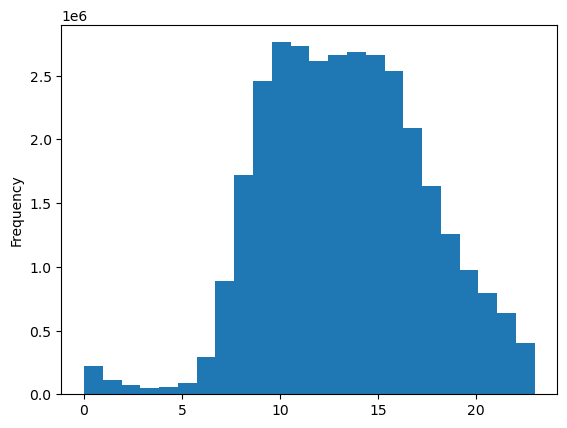

In [6]:
#3 Create a histogram of the order_hour_of_day column
hist = ords_prods_customers_merge['order_hour_of_day'].plot.hist(bins = 24)

#### Since the day has 24 hours, I set the bins equal to 24. The histogram shows the frequency of orders for each hour.
#### During night we can see lower frequency, that means less orders.
#### Then in early morning hours the nummber of orders increase and the high peak is achieved in the middle of the day (11 to 17 +/-).
#### In conclusion I can say the customers prefer late morning and early afternoon to use Instacart.

#4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the loyalty flag column

In [8]:
ords_prods_customers_merge.info

<bound method DataFrame.info of           product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                907        Premium Sliced Bacon       106             12   
3                907        Premium Sliced Bacon       106             12   
4               1000                    Apricots        18             10   
...              ...                         ...       ...            ...   
32404854       49235         Organic Half & Half        53             16   
32404855       49520      Orange Sparkling Water       115              7   
32404856       49520      Orange Sparkling Water       115              7   
32404857       49520      Orange Sparkling Water       115              7   
32404858       49520      Orange Sparkling Water       115              7   

          prices  order_id  user_id eval_se

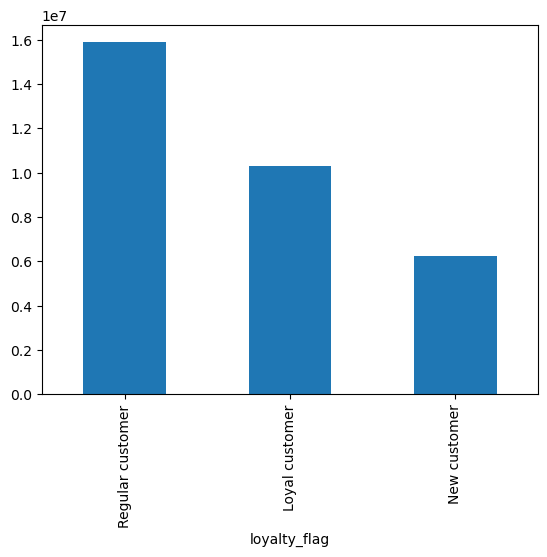

In [9]:
bar = ords_prods_customers_merge['loyalty_flag'].value_counts().plot.bar()

#5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [11]:
# Create a random sample
np.random.seed(4)

In [13]:
#Sampling data 70/30
dev = np.random.rand(len(ords_prods_customers_merge)) <= 0.7

In [14]:
big = ords_prods_customers_merge[dev]
small = ords_prods_customers_merge[~dev]


In [15]:
# create a new dataframe from small dataframe that contains only prices and order_hour_of_day columns
df_2 = small[['order_hour_of_day','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


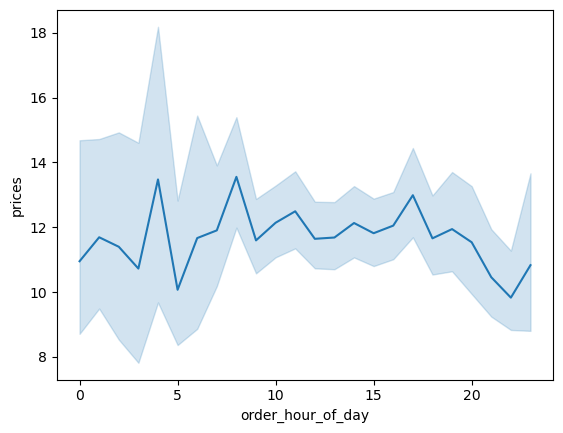

In [16]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')


#####6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.

In [18]:
#Determine whether there is a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents


In [25]:
# create a new dataframe from small dataframe that contains only age and n_dependants columns
df_3 = small[['age','n_dependants']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


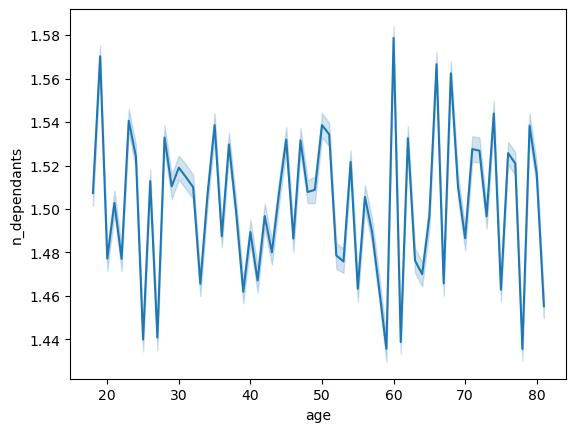

In [20]:
# Create the line chart
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

#### There is no clear pattern between age and number of dependent. I expected more consistent pattern between 30 and 60 years old.
#### And also an increase in the younger people and a descrease in the older users.

In [21]:
#5 You’ll also need to explore whether there’s a connection between age and spending power (income).

In [26]:
# create a new dataframe from small dataframe that contains only age and income columns
df_4 = small[['age','income']]

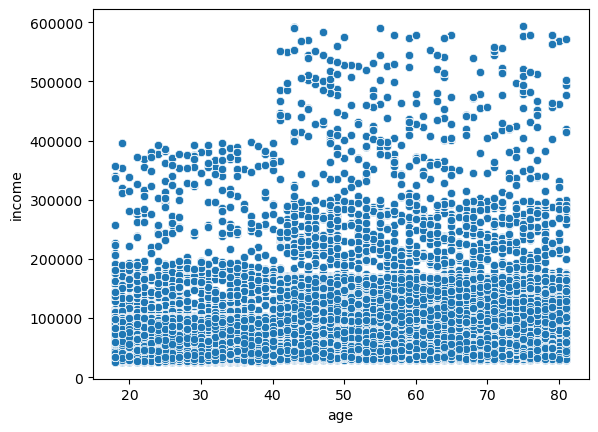

In [27]:
# Create a scatterplot
scatterplot = sns.scatterplot(data = df_4, x = 'age', y = 'income')

#### For all ages there is a concentration on the incomes lower than 200k.
    Younger people (until 40 years old) have incomes lower than 400k and with lower concentration between 200k and 400k.
    From 40 years old onwards, it is possible to identify three different patterns:
    High concentration - incomes lower than 200k (+/-)
    Medium concentration - incomes between 200 and 300k
    Lower concentration - incomes higher than 300k.

In [31]:
#8 - Export your visualizations as “.png” files in your relevant project folder

In [29]:
# Export Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [30]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [32]:
# Export Line chart - expenditure (the prices column) depending on the hour of the day
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'expenditure_over_hours_of_day.png'))

In [33]:
# Export Line chart - connections between age and number of dependents
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_and_n_dependents.png'))

In [34]:
# Export scatterplot - connection between age and spending power (income)
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_spending_power.png'))